In [ ]:
import os
import tweepy as tw
import pandas as pd
import sentiment_mod as s
import json
import pickle
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [11]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth)

In [3]:
def deleteMentions(line):
    split_line = line.split(" ")

    final_split_string = []

    for word in split_line:
        skip_word = False
        for letter in word:
            if letter == '@':
                #check if the current word contains a mention
                skip_word = True

        if not skip_word:
            #skip a word if it contains mention
            final_split_string.append(word)

    final_string = " ".join(final_split_string)
    return final_string

In [4]:
def cleanData(txt):
    txt = deleteMentions(txt)
    txt = txt.replace("\n", "").replace("RT", "").replace("https","").replace("co", "").replace("McDonald", "").replace("Twitter", "").replace("mcdonald", "")
    return txt

In [5]:
# Define the search term and the date_since date as variables
search_words = "@McDonalds"
date_since = "2020-02-01"
neg_tweets = ""
pos_tweets = ""
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)
for tweet in tweets:
    sentiment_value, confidence = s.sentiment(tweet.text)
    if 'RT' not in tweet.text:
        tweet.text = cleanData(tweet.text)
        print(tweet.text, sentiment_value, confidence)
        if confidence*100 >= 80 and sentiment_value == 'pos':
            pos_tweets += tweet.text
        if confidence*100 >= 80 and sentiment_value == 'neg':
            neg_tweets += tweet.text

if the guy above gets suspended you lose all ntext, and your job neg 1.0
imagine not looking at my tweet s neg 0.8
I caved. ://t./jL4t5n13Gj neg 0.8
Their burgers are so progressive I got food poisoningFuck and their quarter pounder SHIT ://t./oQ0pp0Gyf5 pos 1.0
HUNGRY? back its beloved Shamrock Shake today. ://t./ruuldF82Ts pos 1.0
Aired neg 0.8
what ://t./T4npOJL6D3 neg 0.8
://t./mE8PiBSx2v neg 0.8
You’re trash ♥️ neg 1.0
Baby at this point y’all know we are going to be in this pandemic for at least 2-3 years you mean to tel… ://t./SkNAwWBa6l pos 0.6
Party's over. Maybe sleep? Game? neg 1.0
we need to have a nversation about the word “oked” ://t./9JMg1jzieV neg 1.0
YEAH TELL THEM neg 0.8
probably intentional because it’s well known on twitter and interns probably use twitter pos 1.0
://t./491qO9mATX neg 0.8
Whatd i do? neg 1.0
i miss us neg 1.0
Celiac friendly menu itemmmssssss neg 1.0
Ham 🐷 rock 🗿 shake 🥤With lots of clovers in there neg 0.8
did you know that grubhub perks give you 

In [7]:
def generate_wordcloud(text):
    stwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "like"]
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = stwords# set or space-separated string
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")
    ## Pick One:
    # plt.show()
    plt.savefig("WordCloud.png")

Positive tweets word cloud


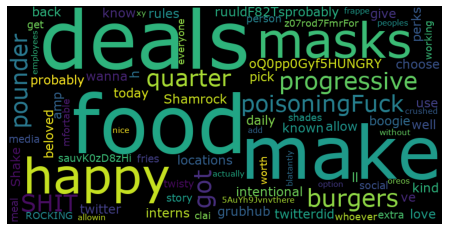

In [8]:
# Generate word cloud
print("Positive tweets word cloud")
generate_wordcloud(pos_tweets)

Negative tweets word cloud


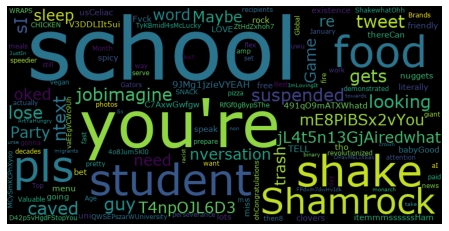

In [9]:
print("Negative tweets word cloud")
generate_wordcloud(neg_tweets)

In [10]:
# Store tweets in pickle file 
with open('twitter-pos.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(pos_tweets, filehandle)
with open('twitter-neg.txt', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(neg_tweets, filehandle)
# Read pickle file
with open('twitter-pos.txt', 'rb') as filehandle:
    # read the data as binary data stream
    posrev = pickle.load(filehandle)
# print(posrev)